# Complex Baseband Representation

The following code cell contains a custom Python function to plot the line spectra of signals in the frequency domain. Click "Run All" when running the notebook for the first time.

**Note 1:** When taking Fourier transform, in most cases, only the magnitude spectrum is of interest because it shows the shape of the transform, and which frequencies are present. 

**Note 2:** When taking the Fourier transform using the FFT function in any software, FFT needs to be scaled. The reason for this explained [in this blog.](https://sites.psu.edu/charlesammon/2017/03/09/how-to-determine-fft-scaling-with-matlab/) 

**Note 2.1:** For periodic signals, the FFT needs to be scaled by the length of the time array `n = len(t)`, probably because the signal is continuous over the entire time array.

**Note 2.2:** For aperiodic signals, the FFT needs to be scaled by time step of the time array `dt = t[1]-t[0]`, probably because the signal only exists for a finite portion of the time array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Define a generic unit step function
def u(t):
    x = np.zeros(len(t))
    # tt keeps track of the value of t while the loop iterates
    # tt is equivalent to t[i]
    for i, tt in enumerate(t):
        if tt > 0:
            x[i] = 1.0
    return x

# Define function for creating a rectangular pulse
# where tau = pulse width and 
# the pulse is active over -tau/2 <= t <= tau/2.
def rect(t,tau):
    x = np.zeros(len(t))
    for i, tt in enumerate(t):
        if (np.abs(tt)>tau/2):
            x[i] = 0
        else:
            x[i] = 1
    return x

# Define a simulated delta function using step functions
def delta(t):
    x = np.zeros(len(t))
    # Td is the pulse width set equal to the time step
    Td = t[1]-t[0]
    # The amplitude is set to 1/Td, so that area under
    # the pulse is unity.
    x = (1/Td)*(u(t)-u(t-Td))
    return x   

# Create time axis
t = np.linspace(0,2,2048)

# Create the frequency axis
dt = t[1]-t[0]
N = len(t)
# The fftshift function will center the 0th frequency.
freq = np.fft.fftshift(np.fft.fftfreq(N,dt)) 


## Complex baseband representation of a bandpass signal
Any bandpass signal, in general, can be written as
$$
g(t) = a(t)\cos\left[(2\pi f_{c}(t))+\phi(t)\right]
$$
where the baseband information is encoded in the time-varying envelope, $a(t)$, and/or in the time-varying phase angle, $\phi(t)$.

Using the property, $\cos(A+B)=\cos(A)\cos(B)-\sin(A)\sin(B)$, the above signal can be expressed as
$$
\begin{align*}
g(t) &= a(t)\cos(\phi(t))\cos(2\pi f_{c}t)-a(t)\sin(\phi(t))\sin(2\pi f_{c}t)\\
g(t) &= g_{I}(t)\cos(2\pi f_{c}t)-g_{Q}(t)\sin(2\pi f_{c}t)
\end{align*}
$$
where $g_{I}(t)=a(t)\cos(\phi(t))$, and $g_{Q}(t)=a(t)\sin(\phi(t))$ are the in-phase and quadrature-phase components respectively.

In terms of a phasor representation, the bandpass signal can be considered the real part of the complex phasor described as:
$$
g(t) = \mathrm{Re}\left[g_{Z}(t)e^{j2\pi f_{c}t}\right]
$$
where the complex envelope, $g_{Z}(t)$, corresponds to
$$
g_{Z}(t) = g_{I}(t)+j\,g_{Q}(t) = a(t)e^{j\phi(t)}
$$
so that, the time-varying envelope is given as
$$
a(t)=|g_{Z}(t)| = \sqrt{g^{2}_{I}(t)+g^{2}_{Q}(t)}
$$
and the time-varying phase angle is given as
$$
\phi(t) = \angle{g_{Z}(t)} = \tan^{-1}\left(\dfrac{g_{Q}(t)}{g_{I}(t)}\right)
$$


Consider a bandpass signal,
$$
g(t) = 2\cos(2\pi f_{m}t)\cos(2\pi f_{c}t)-\sin(2\pi f_{m}t)\sin(2\pi f_{c}t)
$$
where baseband frequency, $f_{m}=2\,\mathrm{Hz}$ and carrier frequency, $f_{c}=10f_{m}=20\,\mathrm{Hz}$

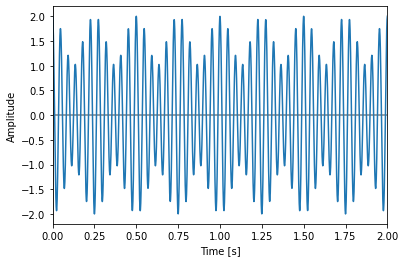

In [2]:
# Define the bandpass signal
fm = 2          # baseband frequency
fc = 10*fm      # carrier frequency
g_t = 2*np.cos(2*np.pi*fm*t)*np.cos(2*np.pi*fc*t) - np.sin(2*np.pi*fm*t)*np.sin(2*np.pi*fc*t)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,g_t)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.show()

### Visualizing the signal in time domain

The complex envelope of the given bandpass signal is:
$$
g_{Z}(t) = 2\cos(2\pi f_{m}t)+j\sin(2\pi f_{m}t)
$$

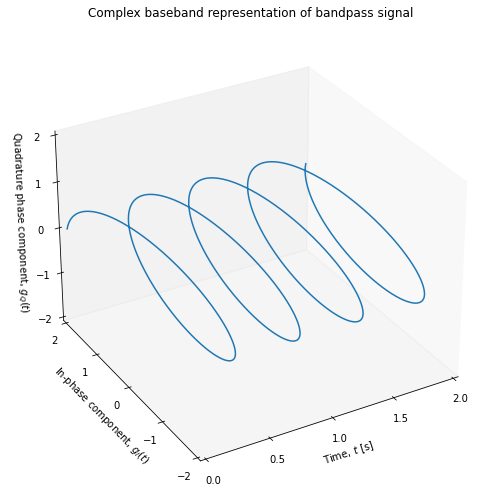

In [3]:
# Define the in-phase and quadrature phase components
gi_t = 2*np.cos(2*np.pi*fm*t)       # in-phase component
gq_t = np.sin(2*np.pi*fm*t)         # quad-phase component

#%matplotlib widget

# Create the figure
fig = plt.figure(figsize=(7,7))
fig.suptitle('Complex baseband representation of bandpass signal')
ax = fig.add_subplot(projection='3d')

# Hide the figure number at the top of the figure
fig.canvas.header_visible = False

# Create the plot (that will go inside the figure)
X, Y, Z = t, gi_t, gq_t
ax.plot(X, Y, Z)

# Set axes limits
ax.set_xlim(0,2)    
ax.set_ylim(-2,2)   
ax.set_zlim(-2,2)

# Set major ticks to be multiples of whatever number is in the parentheses
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.zaxis.set_major_locator(MultipleLocator(1))

# Set minor ticks to be multiples of whatever number is in the parentheses
#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
#ax.zaxis.set_minor_locator(MultipleLocator(0.1))

# Hide grid lines
ax.grid(False)

# Set axes labels
ax.set_xlabel('Time, $t$ [s]')
ax.set_ylabel('In-phase component, $g_{I}(t)$')
ax.set_zlabel('Quadrature phase component, $g_{Q}(t)$')

# Change viewing angle
ax.view_init(elev=30, azim=-120)

# Display the plot
plt.tight_layout()
plt.show()  


### 2D projections
The in-phase component, $g_{I}(t)$, corresponds to
$$
g_{I}(t) =  2\cos(2\pi 2t)
$$
and the quadrature-phase component, $g_{Q}(t)$, corresponds to
$$
g_{Q}(t) =  \sin(2\pi 2t)
$$

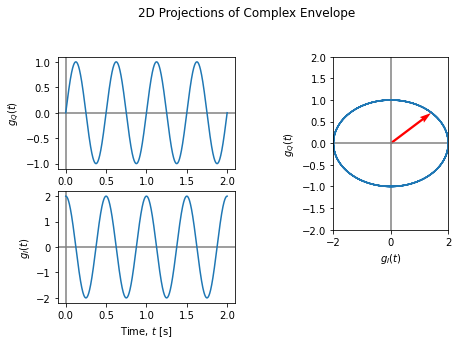

In [4]:
# Define peak value
A = 0.7*np.sqrt(np.amax(gi_t)**2+np.amax(gq_t)**2)
theta = np.arctan2(np.amax(gq_t),np.amax(gi_t))

# Plot 2D views of the complex sinusoid
fig = plt.figure(figsize=(7,7))
fig.suptitle('2D Projections of Complex Envelope')

fig.add_subplot(3,2,1)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t, gq_t)
plt.ylabel('$g_{Q}(t)$')
#plt.xlabel('Time, $t$ [s]')

fig.add_subplot(3,2,3)
plt.axvline(color='gray') 
plt.axhline(color='gray')
plt.plot(t, gi_t)
plt.ylabel('$g_{I}(t)$')
plt.xlabel('Time, $t$ [s]')

fig.add_subplot(2,3,3)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(gi_t, gq_t)
plt.quiver(0,0,A*np.cos(theta),A*np.sin(theta),angles='xy',scale_units='xy',scale=1,color='red',width=0.02)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.ylabel('$g_{Q}(t)$')
plt.xlabel('$g_{I}(t)$')

plt.show()

The envelope of the bandpass signal is given as
$$
\begin{align*}
a(t) &= \sqrt{g^{2}_{I}(t)+g^{2}_{Q}(t)}\\
&= \sqrt{4\cos^{2}(2\pi 2t)+\sin^{2}(2\pi 2t)} = \sqrt{1+3\cos^{2}(2\pi 2t)}
\end{align*}
$$
The phase of the bandpass signal is given as
$$
\begin{align*}
\phi(t) &= \tan^{-1}\left(\dfrac{g_{Q}(t)}{g_{I}(t)}\right)\\
&= \tan^{-1}\left(\dfrac{\sin(2\pi 2t)}{2\cos(2\pi 2t)}\right)
\end{align*}
$$

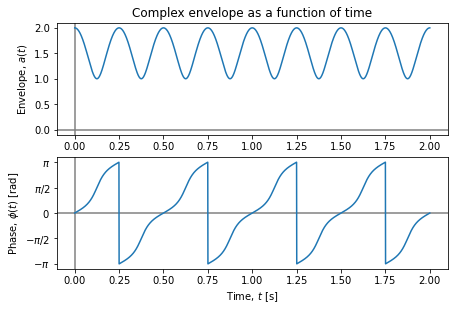

In [5]:
# Define the complex envelope
gz_t = gi_t + 1j*gq_t
a_t = np.abs(gz_t)          # envelope
phi_t = np.angle(gz_t)      # phase

# Plot the complex envelope as a function of time
plt.figure(figsize=(7,7))
plt.subplot(311)
plt.title('Complex envelope as a function of time')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,a_t)
plt.ylabel('Envelope, $a(t)$')

plt.subplot(312)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,phi_t)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks)            
plt.ylabel('Phase, $\phi(t)$ [rad]')

plt.xlabel('Time, $t$ [s]')
plt.show()

## Frequency domain representation

### Fourier transfer of the in-phase and quadrature phase components
The in-phase and quadrature-phase components of $g(t)$ can be expanded using Fourier series.
$$
\begin{align*}
g_{I}(t) &= \dfrac{2}{2}e^{j2\pi 2t}+\dfrac{2}{2}e^{-j2\pi 2t}\\
g_{Q}(t) &= \dfrac{1}{2j}e^{j2\pi 2t}-\dfrac{1}{2j}e^{-j2\pi 2t}\\
\end{align*} 
$$

Their Fourier transform can be written as
$$
\begin{align*}
G_{I}(f) &= 1\,\delta(f-2)+1\,\delta(f+2)\\
G_{Q}(f) &= -j0.5\,\delta(f-2)+j0.5\,\delta(f+2)\\
&= 0.5\,e^{-j\pi/2}\,\delta(f-2) + 0.5\,e^{j\pi/2}\,\delta(f+2)
\end{align*}
$$

The baseband bandwidth corresponds to the spectrum extending from the origin to the highest frequency components present on the positive frequency axis, which in this case is $2\,\mathrm{Hz}$. So,
$$
W = 2\,\mathrm{Hz}
$$ 

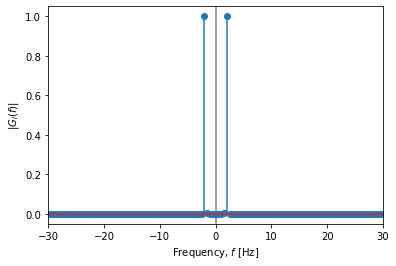

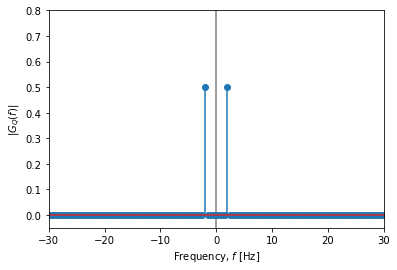

In [6]:
# Calculate FFT. 
GI_f = np.fft.fftshift(np.fft.fft(gi_t))/N     # in-phase component
GQ_f = np.fft.fftshift(np.fft.fft(gq_t))/N     # quad-phase component

# Plot the in-phase magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(GI_f))
plt.xlim(-30,30)
plt.xlabel('Frequency, $f$ [Hz]')
plt.ylabel('$|G_{I}(f)|$')
plt.show()

# Plot the quadrature phase magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(GQ_f))
plt.xlim(-30,30)
plt.ylim(-0.05,0.8)
plt.xlabel('Frequency, $f$ [Hz]')
plt.ylabel('$|G_{Q}(f)|$')
plt.show()

### Fourier transform of the complex envelope
The complex envelope can also be expanded using Fourier series.
$$
\begin{align*}
g_{Z}(t) &= x_{I}(t)+jx_{Q}(t)\\
&= 1\,e^{j2\pi 2t}+1\,e^{-j2\pi 2t}\\
&+ j \left[\dfrac{1}{2j}e^{j2\pi 2t}-\dfrac{1}{2j}e^{-j2\pi 2t}\right]\\
g_{Z}(t)&= 1\,e^{j2\pi 2t}+1\,e^{-j2\pi 2t}+0.5\,e^{j2\pi 2t}-0.5\,e^{-j2\pi 2t}
\end{align*}
$$

The Fourier transform of the complex envelope can be determined as
$$
\begin{align*}
G_{Z}(f) &= G_{I}(f) + j\,G_{Q}(f)\\
&= 1\,\delta(f-2)+1\,\delta(f+2)+ j[-j0.5\,\delta(f-2)+j0.5\,\delta(f+2)]\\
&= 1\,\delta(f-2)+1\,\delta(f+2)+ 0.5\,\delta(f-2)-0.5\,\delta(f+2)\\
G_{Z}(f) &= 1.5\,\delta(f-2)+0.5\,\delta(f+2) 
\end{align*}
$$

The magnitude spectrum is shown below.

The baseband bandwidth corresponds to the spectrum extending from the origin to the highest frequency components present on the positive frequency axis, which in this case is $2\,\mathrm{Hz}$. So,
$$
W = 2\,\mathrm{Hz}
$$ 

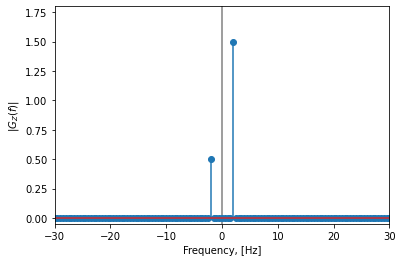

In [7]:
# Calculate FFT of complex envelope
GZ_f = np.fft.fftshift(np.fft.fft(gz_t))/N

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(GZ_f))
plt.xlim(-30,30)
plt.ylim(-0.05,1.8)
plt.xlabel('Frequency, [Hz]')
plt.ylabel('$|G_{Z}(f)|$')
plt.show()


### Fourier transform of the bandpass signal
Since the bandpass signal can be expressed as
$$
\begin{align*}
g(t) &= \mathrm{Re}\left[g_{Z}(t)e^{j2\pi f_{c}}t\right]\\
&= g_{Z}(t)\cos(2\pi f_{c}t)\\
&= \dfrac{1}{2}\left[g_{Z}(t)e^{j2\pi f_{c}t}+g_{Z}^{*}(t)e^{-j2\pi f_{c}t}\right]
\end{align*}
$$
Using the frequency translation (shifting) property, the Fourier transform of the bandpass signal can be expressed as
$$
G(f) = \dfrac{1}{2}\left[G_{Z}(f-f_{c})+G_{Z}^{*}(-f-f_{c})\right]
$$

For the given signal,
$$
G_{Z}(f) = 1.5\,\delta(f-2)+0.5\,\delta(f+2) 
$$
Since the complex conjugate reverses sign of the imaginary part, the complex conjugate of the complex envelope will be
$$
\begin{align*}
G_{Z}^{*}(-f) &= G_{I}(f) - jG_{Q}(f)\\
&= 1\,\delta(f-2) + 1\,\delta(f+2) -j[-j0.5\,\delta(f-2)+j0.5\,\delta(f+2)]\\
&= 1\,\delta(f-2) + 1\,\delta(f+2) -0.5\,\delta(f-2) + 0.5\,\delta(f+2)\\
G_{Z}^{*}(-f) &= 0.5\,\delta(f-2) + 1.5\,\delta(f+2)
\end{align*}
$$
Therefore, for a carrier frequency of $f_{c}=20\,\mathrm{Hz}$, the Fourier transform of the given bandpass signal is
$$
G(f) = \dfrac{1}{2}\left[G_{Z}(f-f_{c})+G_{Z}^{*}(-f-f_{c})\right]
$$
where
$$
\begin{align*}
G_{Z}(f-f_{c}) &= G_{I}(f-f_{c}) + j G_{Q}(f-f_{c})\\
G_{Z}^{*}(-f-f_{c}) &= G_{I}(f+f_{c}) - j G_{Q}(f+f_{c})
\end{align*}
$$
Thus,
$$
\begin{align*}
G(f) &= \dfrac{1}{2}\left[G_{Z}(f-f_{c})+G_{Z}^{*}(-f-f_{c})\right]\\
\\
&= \dfrac{1}{2}\left[1.5\,\delta(f-2-f_{c})+0.5\,\delta(f+2-f_{c})+0.5\,\delta(f-2+f_{c})+1.5\,\delta(f+2+f_{c})\right]\\
\\
&= \dfrac{1}{2}\left[1.5\,\delta(f-2-20)+0.5\,\delta(f+2-20)+0.5\,\delta(f-2+20)+1.5\,\delta(f+2+20)\right]\\
\\
G(f)&= 0.75\,\delta(f-22)+0.25\,\delta(f-18)+0.25\,\delta(f+18)+0.75\,\delta(f+22)
\end{align*}
$$

The bandpass bandwidth corresponds to the spectrum extending from the lowest frequency component to the highest frequency component present on the positive frequency axis. So,
$$
\begin{align*}
B &= f_{c}+f_{m}-f_{c}+f_{m}\\
&= 2f_{m}\\
&= 4\,\mathrm{Hz}
\end{align*}
$$ 

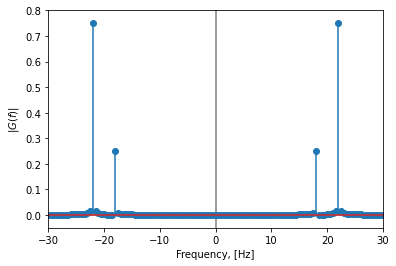

In [8]:
 #Calculate FFT of bandpass signal
G_f = np.fft.fftshift(np.fft.fft(g_t))/N

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(G_f))
plt.xlim([-30,30])
plt.ylim(-0.05,0.8)
plt.xlabel('Frequency, [Hz]')
plt.ylabel('$|G(f)|$')
plt.show()

## Baseband signal with multiple frequency components

Consider the following bandpass signal whose in-phase and quadrature-phase components are given below:
$$
\begin{align*}
x_{I}(t) &= 12\cos(6\pi t)+2\cos(10\pi t)\\
x_{Q}(t) &= 2\sin(6\pi t)+3\sin(10\pi t)
\end{align*}
$$
Determine the bandwidth of the these components. Assuming $f_{c}=20\,\mathrm{Hz}$, determine the bandwidth of its bandpass version. Only plot the magnitude spectrum.

Determine the magnitude spectrum of the complex envelope of the the bandpass version.

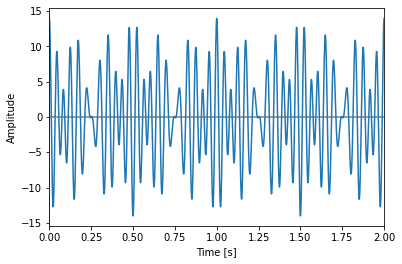

In [9]:
# Define the bandpass signal
fc = 20         # carrier frequency
x_t = (12*np.cos(2*np.pi*3*t)+2*np.cos(2*np.pi*5*t))*np.cos(2*np.pi*fc*t) - (2*np.sin(2*np.pi*3*t)+3*np.sin(2*np.pi*5*t))*np.sin(2*np.pi*fc*t)

# Define the in-phase and quadrature phase components
xi_t = 8*np.cos(2*np.pi*4*t)+2*np.cos(2*np.pi*8*t)+6*np.cos(2*np.pi*12*t)+12*np.cos(2*np.pi*16*t)    # in-phase component
xq_t = 6*np.cos(2*np.pi*4*t)+10*np.cos(2*np.pi*8*t)+12*np.cos(2*np.pi*12*t)+5*np.cos(2*np.pi*16*t)   # quadrature-phase component

xa_t = np.sqrt(xi_t**2+xq_t**2)

# Plot the signal
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,x_t)
#plt.plot(t,xa_t,linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0,2)
plt.show()


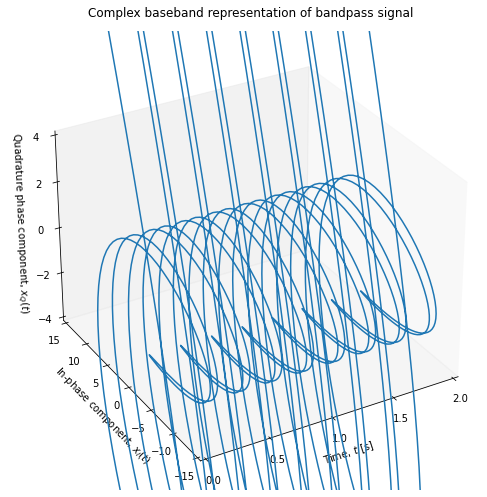

In [10]:
# Create the figure
fig = plt.figure(figsize=(7,7))
fig.suptitle('Complex baseband representation of bandpass signal')
ax = fig.add_subplot(projection='3d')

# Hide the figure number at the top of the figure
fig.canvas.header_visible = False

# Create the plot (that will go inside the figure)
X, Y, Z = t, xi_t, xq_t
ax.plot(X, Y, Z)

# Set axes limits
ax.set_xlim(0,2)    
ax.set_ylim(-15,15)   
ax.set_zlim(-4,4)

# Set major ticks to be multiples of whatever number is in the parentheses
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.zaxis.set_major_locator(MultipleLocator(2))

# Set minor ticks to be multiples of whatever number is in the parentheses
#ax.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
#ax.zaxis.set_minor_locator(MultipleLocator(0.1))

# Hide grid lines
ax.grid(False)

# Set axes labels
ax.set_xlabel('Time, $t$ [s]')
ax.set_ylabel('In-phase component, $x_{I}(t)$')
ax.set_zlabel('Quadrature phase component, $x_{Q}(t)$')

# Change viewing angle
ax.view_init(elev=30, azim=-120)

# Display the plot
plt.tight_layout()
plt.show() 

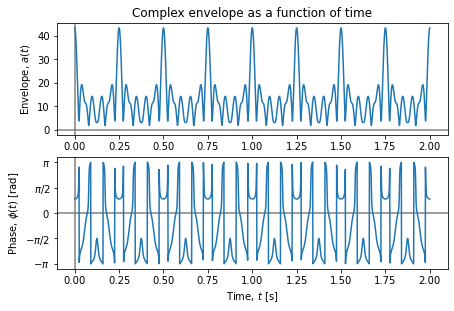

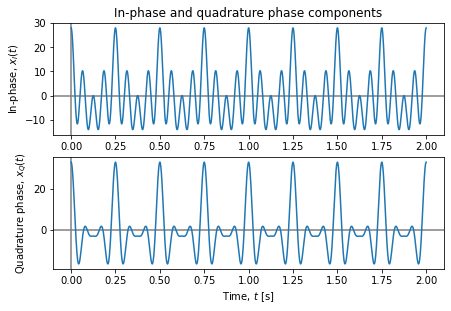

In [11]:
# Define the complex envelope
xz_t = xi_t + 1j*xq_t
xa_t = np.abs(xz_t)          # envelope
xphi_t = np.angle(xz_t)      # phase

# Plot the complex envelope as a function of time
plt.figure(figsize=(7,7))
plt.subplot(311)
plt.title('Complex envelope as a function of time')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,xa_t)
plt.ylabel('Envelope, $a(t)$')

plt.subplot(312)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,xphi_t)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks)            
plt.ylabel('Phase, $\phi(t)$ [rad]')

plt.xlabel('Time, $t$ [s]')
plt.show()

# Plot the complex envelope as a function of time
plt.figure(figsize=(7,7))
plt.subplot(311)
plt.title('In-phase and quadrature phase components')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,xi_t)
plt.ylabel('In-phase, $x_{I}(t)$')

plt.subplot(312)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,xq_t)         
plt.ylabel('Quadrature phase, $x_{Q}(t)$')

plt.xlabel('Time, $t$ [s]')
plt.show()


The in-phase and quadrature-phase components can be expanded using Fourier series.
$$
\begin{align*}
x_{I}(t) &= \dfrac{12}{2}e^{j2\pi 3t}+\dfrac{12}{2}e^{-j2\pi 3t}+\dfrac{2}{2}e^{j2\pi 5t}+\dfrac{2}{2}e^{-j2\pi 5t}\\
&= 6\,e^{j2\pi 3t}+6\,e^{-j2\pi 3t}+e^{j2\pi 5t}+e^{-j2\pi 5t}\\
\\
x_{Q}(t) &= \dfrac{2}{2j}e^{j2\pi 3t}-\dfrac{2}{2j}e^{-j2\pi3t}+\dfrac{3}{2j}e^{j2\pi 5t}-\dfrac{3}{2j}e^{-j2\pi 5t}\\
&= \dfrac{1}{j}e^{j2\pi 3t}-\dfrac{1}{j}e^{-j2\pi3t}+\dfrac{1.5}{j}e^{j2\pi 5t}-\dfrac{1.5}{j}e^{-j2\pi 5t}
\end{align*}
$$

The Fourier transform of these components are given as
$$
\begin{align*}
X_{I}(f) &= 6\,\delta(f-3)+6\,\delta(f+3)+\delta(f-5)+\delta(f+5)\\
\\
X_{Q}(f) &= -j1\,\delta(f-3) + j1\,\delta(f+3) - j1.5\,\delta(f-5) + j1.5\,\delta(f+5)\\
&= 1\,e^{-j\pi/2}\delta(f-3) + 1\,e^{j\pi/2}\delta(f+3) + 1.5\,e^{-j\pi/2}\delta(f-5) + 1.5\,e^{j\pi/2}\delta(f+5) 
\end{align*}
$$

The magnitude spectrum is shown below.

The bandwidth of both functions corresponds to the spectrum extending from the origin to the highest frequency components present on the positive frequency axis, which in this case is $5\,\mathrm{Hz}$. So,
$$
W = 5\,\mathrm{Hz}
$$ 

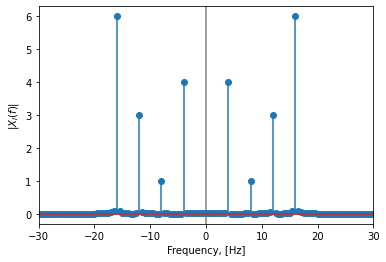

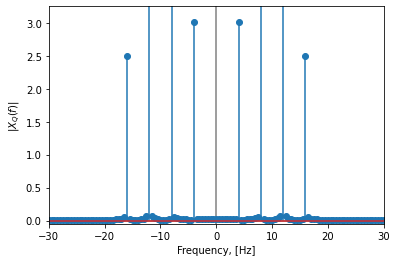

In [12]:
# Calculate FFT. 
XI_f = np.fft.fftshift(np.fft.fft(xi_t))/N     # in-phase component
XQ_f = np.fft.fftshift(np.fft.fft(xq_t))/N     # quad-phase component

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(XI_f))
plt.xlim([-30,30])
plt.xlabel('Frequency, [Hz]')
plt.ylabel('$|X_{I}(f)|$')
plt.show()

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(XQ_f))
plt.xlim([-30,30])
plt.ylim(-0.05,3.25)
plt.xlabel('Frequency, [Hz]')
plt.ylabel('$|X_{Q}(f)|$')
plt.show()

The complex envelope can also be expanded using Fourier series.
$$
\begin{align*}
x_{Z}(t) &= x_{I}(t)+jx_{Q}(t)\\
\\
&= 6e^{j2\pi 3t}+6e^{-j2\pi 3t}+e^{j2\pi 5t}+e^{-j2\pi 5t}\\
&+ j \left[\dfrac{1}{j}e^{j2\pi 3t}-\dfrac{1}{j}e^{-j2\pi3t}+\dfrac{1.5}{j}e^{j2\pi 5t}-\dfrac{1.5}{j}e^{-j2\pi 5t}\right]\\
\\
x_{Z}(t)&= 6\,e^{j2\pi 3t}+6\,e^{-j2\pi 3t}+e^{j2\pi 5t}+e^{-j2\pi 5t}\\
&+ e^{j2\pi 3t}-e^{-j2\pi3t}+1.5\,e^{j2\pi 5t}-1.5\,e^{-j2\pi 5t}
\end{align*}
$$

The Fourier transform of the complex envelope can be determined as
$$
\begin{align*}
X_{Z}(f) &= X_{I}(f) + jX_{Q}(f)\\
\\
&= 6\,\delta(f-3)+6\,\delta(f+3)+1\,\delta(f-5)+1\,\delta(f+5)\\
&+ j[-j1\,\delta(f-3) + j1\,\delta(f+3) - j1.5\,\delta(f-5) + j1.5\,\delta(f+5)]\\
\\
&= 6\,\delta(f-3)+6\,\delta(f+3)+1\,\delta(f-5)+1\,\delta(f+5)\\
&+ 1\,\delta(f-3)-1\,\delta(f+3)+1.5\,\delta(f-5)-1.5\,\delta(f+5)\\
\\
X_{Z}(f) &= 7\,\delta(f-3)+5\,\delta(f+3)+2.5\,\delta(f-5)-0.5\,\delta(f+5) 
\end{align*}
$$

The magnitude spectrum is shown below.

The bandwidth corresponds to the spectrum extending from the origin to the highest frequency components present on the positive frequency axis, which in this case is $5\,\mathrm{Hz}$. So,
$$
W = 5\,\mathrm{Hz}
$$ 

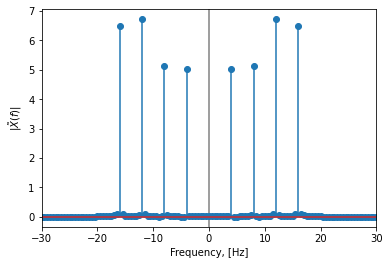

In [13]:
# Calculate FFT. 
XZ_f = np.fft.fftshift(np.fft.fft(xz_t))/N     # complex envelope 

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(XZ_f))
plt.xlim([-30,30])
plt.xlabel('Frequency, [Hz]')
plt.ylabel('$|\\tilde{X}(f)|$')
plt.show()

For the given signal,
$$
X_{Z}(f) = 7\,\delta(f-3)+5\,\delta(f+3)+2.5\,\delta(f-5)-0.5\,\delta(f+5) 
$$
Since the complex conjugate reverses sign of the imagniary part, the complex conjugate of the complex envelope will be
$$
\begin{align*}
X_{Z}^{*}(-f) &= X_{I}(f) -jX_{Q}(f)\\
\\
&= 6\,\delta(f-3)+6\,\delta(f+3)+1\,\delta(f-5)+1\,\delta(f+5)\\
&- j[-j1\,\delta(f-3) + j1\,\delta(f+3) - j1.5\,\delta(f-5) + j1.5\,\delta(f+5)]\\
\\ 
&= 6\,\delta(f-3) + 6\,\delta(f+3) + 1\,\delta(f-5) + 1\,\delta(f+5)\\
&- 1\,\delta(f-3) + 1\,\delta(f+3) - 1.5\,\delta(f-5) + 1.5\,\delta(f+5)\\
\\
X_{Z}^{*}(-f) &= 5\,\delta(f-3) + 7\,\delta(f+3) - 0.5\,\delta(f-5) + 2.5\,\delta(f+5)
\end{align*} 
$$
Therefore, for a carrier frequency of $f_{c}=20\,\mathrm{Hz}$, the Fourier transform of the given bandpass signal is
$$
X(f) = \dfrac{1}{2}\left[X_{Z}(f-f_{c})+X_{Z}^{*}(-f-f_{c})\right]
$$
where
$$
\begin{align*}
X_{Z}(f-f_{c}) &= X_{I}(f-f_{c}) + j X_{Q}(f-f_{c})\\
X_{Z}^{*}(-f-f_{c}) &= X_{I}(f+f_{c}) - j X_{Q}(f+f_{c})
\end{align*}
$$
Thus,
$$
\begin{align*}
X(f) &= \dfrac{1}{2}\left[X_{Z}(f-f_{c})+X_{Z}^{*}(-f-f_{c})\right]\\
\\
&= \dfrac{1}{2}\left[7\,\delta(f-3-f_{c})+5\,\delta(f+3-f_{c})+2.5\,\delta(f-5-f_{c})-0.5\,\delta(f+5-f_{c})\right]\\
&+\dfrac{1}{2}\left[5\,\delta(f-3+f_{c})+7\,\delta(f+3+f_{c})-0.5\,\delta(f-5+f_{c})+2.5\,\delta(f+5+f_{c})\right]\\
\\
&= \dfrac{1}{2}\left[7\,\delta(f-3-20)+5\,\delta(f+3-20)+2.5\,\delta(f-5-20)-0.5\,\delta(f+5-20)\right]\\
&+\dfrac{1}{2}\left[5\,\delta(f-3+20)+7\,\delta(f+3+20)-0.5\,\delta(f-5+20)+2.5\,\delta(f+5+20)\right]\\
\\
X(f) &= 3.5\,\delta(f-23)+2.5\,\delta(f-17)+1.25\,\delta(f-25)-0.25\,\delta(f-15)\\
&+ 2.5\,\delta(f+17)+3.5\,\delta(f+23)-0.25\,\delta(f+15)+2.5\,\delta(f+25)\\
\end{align*}
$$

The bandpass bandwidth corresponds to the spectrum extending from the lowest frequency component to the highest frequency component present on the positive frequency axis. So,
$$
\begin{align*}
B &= f_{c}+f_{m}-f_{c}+f_{m}\\
&= 2f_{m}\\
&= 10\,\mathrm{Hz}
\end{align*}
$$ 

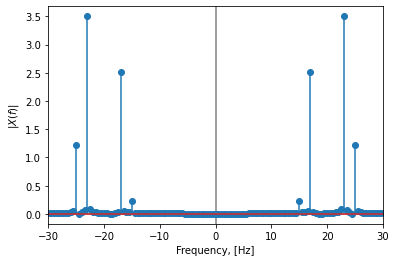

In [14]:
# Calculate FFT of bandpass signal
X_f = np.fft.fftshift(np.fft.fft(x_t))/N

# Plot the magnitude spectrum
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(X_f))
plt.xlim([-30,30])
plt.xlabel('Frequency, [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()